In [1]:
import numpy as np
import tensorflow
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.layers import  Dense, Flatten 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential 
from sklearn.utils import shuffle 
from sklearn.model_selection import KFold
from tensorflow.keras.models import model_from_json

/Users/rlorvi/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/rlorvi/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/rlorvi/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/rlorvi/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


### Load data

In [2]:
spam_data = pd.read_csv('communities.csv', header = None)
spam_data

0   1      2                    3    4    ...   123  124   125   126   127
0       8   ?      ?         Lakewoodcity    1  ...   0.9  0.5  0.32  0.14  0.20
1      53   ?      ?          Tukwilacity    1  ...     ?    ?  0.00     ?  0.67
2      24   ?      ?         Aberdeentown    1  ...     ?    ?  0.00     ?  0.43
3      34   5  81440  Willingborotownship    1  ...     ?    ?  0.00     ?  0.12
4      42  95   6096    Bethlehemtownship    1  ...     ?    ?  0.00     ?  0.03
...   ...  ..    ...                  ...  ...  ...   ...  ...   ...   ...   ...
1989   12   ?      ?    TempleTerracecity   10  ...     ?    ?  0.00     ?  0.09
1990    6   ?      ?          Seasidecity   10  ...     ?    ?  0.00     ?  0.45
1991    9   9  80070        Waterburytown   10  ...  0.78    0  0.91  0.28  0.23
1992   25  17  72600          Walthamcity   10  ...  0.79    0  0.22  0.18  0.19
1993    6   ?      ?          Ontariocity   10  ...  0.73  0.5  1.00  0.13  0.48

[1994 rows x 128 columns]

### Split the data in training, evalatuation and testing data

    - TRAINING DATA (60%) :  1196 EXAMPLES
    - EVALUATION DATA (20%) : 399 EXAMPLES
    - TESTING DATA (20%) : 399 EXAMPLES 

In [3]:
coef_test = 0.2
coef_eval = 0.2

### Load_crime_data

In [4]:
def load_crime_data(spam_data,coef_test,coef_eval):
    
    # GET RID OF THE EMPHY DATA
    
    spam_data = spam_data.values
    x_spam_data = spam_data[:,5:-1]
    y_spam_data = spam_data[:,-1]
    y_spam_data = y_spam_data.astype('float32')
    
    selec_int_x = (x_spam_data == '?')
    selec_int_x = sum(selec_int_x)
    
    selec_int_column = (selec_int_x == 1675)
    x_spam_data = x_spam_data[:,~selec_int_column]
    
    selec_int_x_2 = (x_spam_data == '?')
    x_spam_data[selec_int_x_2] = 0.28
    
    num_data = len(x_spam_data)
    num_data_test = round (num_data * coef_test)
    num_data_eval = round (num_data * coef_eval)
        
    
    # TEST DATA: DIVIDE FROM THE DATA 

    x_spam_data_test = x_spam_data[num_data - num_data_test:,:]
    y_spam_data_test = y_spam_data[num_data - num_data_test:]
    
    # TRAIN DATA: FIRST NORMALIZE AND THEN DIVIDE IN EVALUATION AND TRAINING DATA
    
    x_spam_data_train = x_spam_data[0:num_data - num_data_test,:]
    y_spam_data_train = y_spam_data[0:num_data - num_data_test]
    x_spam_data_train = x_spam_data_train.astype('float32') 
    x_spam_data_train_mean = x_spam_data_train.astype('float32').mean(axis=0)
    x_spam_data_train -= x_spam_data_train_mean
    x_spam_data_train_std = x_spam_data_train.std(axis = 0)
    x_spam_data_train /= x_spam_data_train_std
    
    x_spam_data_eval = x_spam_data_train[len(x_spam_data_train) - num_data_eval:len(x_spam_data_train),:]
    y_spam_data_eval = y_spam_data_train[len(x_spam_data_train) - num_data_eval:len(x_spam_data_train)]
    m = len(x_spam_data_train)
    x_spam_data_train = x_spam_data_train[0:m - num_data_eval,:]
    y_spam_data_train = y_spam_data_train[0:m - num_data_eval]
    
    # NORMALIZE A THE TEST DATA
    
    x_spam_data_test = x_spam_data_test.astype('float32') 
    x_spam_data_test -= x_spam_data_train_mean
    x_spam_data_test /= x_spam_data_train_std
    
    return x_spam_data_test,y_spam_data_test,x_spam_data_eval,y_spam_data_eval,x_spam_data_train,y_spam_data_train
    

In [5]:
x_com_data_test,y_com_data_test,x_com_data_eval,y_com_data_eval,x_com_data_train,y_com_data_train = load_crime_data(spam_data,coef_test,coef_eval)

### Models

In [6]:
def create_model(model_name):
    if model_name==1:
        
        model1 = Sequential()
        model1.add(Dense(128,activation='relu'))
        model1.add(Dense(64,activation='relu'))
        model1.add(Dense(32,activation='relu'))
        model1.add(Dense(16,activation='relu'))
        model1.add(Dense(units=1))
        model1.compile(optimizer='adam',loss='mse',metrics=['mae'])
        return model1
    
    if model_name==2:
        
        model1 = Sequential()
        model1.add(Dense(64,activation='relu'))
        model1.add(Dense(64,activation='relu'))
        model1.add(Dense(32,activation='relu'))
        model1.add(Dense(16,activation='relu'))
        model1.add(Dense(units=1))
        model1.compile(optimizer='adam',loss='mse',metrics=['mae'])
        return model1
    
    if model_name==3:
        
        model1 = Sequential()
        model1.add(Dense(128,activation='relu'))
        model1.add(Dense(64,activation='relu'))
        model1.add(Dense(64,activation='relu'))
        model1.add(Dense(32,activation='relu'))
        model1.add(Dense(16,activation='relu'))
        model1.add(Dense(units=1))
        model1.compile(optimizer='adam',loss='mse',metrics=['mae'])
        return model1

### Croos Validation

In [7]:
def KValitation(x_com_data_train,y_com_data_train,model_name,k = 10,epochs = 100):
    
    num_val_samples = len(x_com_data_train)
    all_scores = []
    all_mae_histories_train = []
    all_mae_histories_val = []
    i = 1
    #k-fold validation
    for train_index,test_index in KFold(k).split(x_com_data_train):  
        val_data = x_com_data_train[test_index]
        val_targets = y_com_data_train[test_index]
        
        # Training models 
        
        selec_train_data = x_com_data_train[train_index]
        selec_train_targets = y_com_data_train[train_index]
        
        #Train
        
        model = create_model(model_name)
        history = model.fit(selec_train_data,selec_train_targets,validation_data=(val_data,val_targets),epochs=epochs,verbose=0)
        
        val_mse, val_mae = model.evaluate(val_data,val_targets,verbose=0)
        all_scores.append(val_mae)
        
        i+=1
    
    # Compute MAE and plots
    
    average_mae_history_train = [np.mean([x[i] for x in all_mae_histories_train]) for i in range(epochs)]
    average_mae_history_val = [np.mean([x[i] for x in all_mae_histories_val]) for i in range(epochs)]
    plt.plot(range(1,len(average_mae_history_train) + 1), average_mae_history_train)
    plt.plot(range(1,len(average_mae_history_val) + 1), average_mae_history_val)
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.xlabel('Epochs')
    plt.ylabel('Validation MAE')
    
    print(" MAE: {:.4f}".format(np.mean(all_scores)))

In [8]:
KValitation(x_com_data_train,y_com_data_train,model_name = 1,epochs=80)

/Users/rlorvi/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/rlorvi/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


 MAE: 0.1088


In [9]:
KValitation(x_com_data_train,y_com_data_train,model_name = 2,epochs=80)

 MAE: 0.1188


 MAE: 0.1112


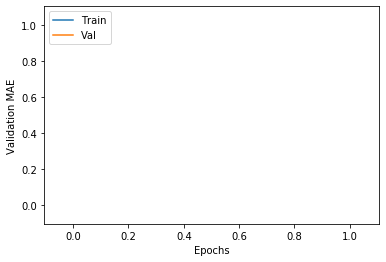

In [10]:
KValitation(x_com_data_train,y_com_data_train,model_name = 3,epochs = 40)

### Test

In [11]:
model3 = create_model(model_name = 3)
model3.fit(x_com_data_train,y_com_data_train,epochs=40,verbose=0)
score = model3.evaluate(x_com_data_test,y_com_data_test)

399/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

### Save

In [12]:
# serialize model to JSON
model_json = model3.to_json()
with open("model_Task3.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model3.save_weights("model_Task3.h5")
print("Saved model to disk")

Saved model to disk


### Load

In [13]:
# load json and create model
json_file = open('model_Task3.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model3.load_weights("model_Task3.h5")
model3.compile(optimizer='adam', loss='mse', metrics=['mae'])